<a href="https://colab.research.google.com/github/HAN-GEONHUI/test/blob/t_academy_%EC%88%98%EC%97%85_ML/ML%EC%BD%94%EB%93%9C(240924).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 목적: Scikit-Learn에 대한 기본적인 소개-> 불러서 그냥 사용
# 단 데이터 핸들링을 위해서 pandas도 사용

In [ ]:
#0.데이터 핸들링+데이터 수집/.전처리
import pandas as pd
import numpy as np

In [ ]:
#1. scikit-learn에서 ml로 전통적인 모델링-> 본인이 필요한 모듈을 불러서 사용한다.
#1-1 샘플데이터: 수집한 데이터, 받은 데이터-->MNIST 필기체.,(자주 변경)
from sklearn.datasets import fetch_openml
#1-2 주어진 데이터를 분리: train_test_split
from sklearn.model_selection import train_test_split
#1-3 내가 사용할/피팅할 f의 스타일을 결정:어떤 모델을 사용할지,
#knn
#참고)파이썬/scikit-learn:분류--> ~~Classifier
#                         회귀--> ~~Regressor
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# 1-4)평가: 여러가지 평가지표--> 성능을 판단
#           여기서는 간단하게 accuracy etc
#           없는 지표는 만들어서 해야함.
from sklearn.metrics import accuracy_score

In [ ]:
#기존의 데이터셋:mnist 가지고 와서 하려고 함
#--> 데이터 가지고 오는 부분은 변경이 자주 일어남                          2차원을 1차로원으로 펴서 그렇고 ? 요게 맞나 요것도 찾아봐
mnist = fetch_openml("mnist_784",version=1,as_frame=False,parser="auto") #픽셀 28X28을 해서 784개가 있기 때문에 784이다. 가로 784 세로 7만장이다. 자세한거는 좀 더 공부해보아라.
mnist                                                                    #머신러닝 하기 위해서는 모든 데이터를 2차원에 때려 박아야 한다고 함.

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [ ]:
mnist["data"]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
mnist['data']
#둘다 되나 궁금해서 해봄

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
mnist["data"].shape

(70000, 784)

In [ ]:
#주어진 데이터의 Feature/속성:2D matrix
X = mnist["data"]
X.shape

(70000, 784)

In [ ]:
#정답에 대한 부분을 고민을 해야 함
y = mnist["target"]
y.shape

(70000,)

In [ ]:
#중요
#전통적인 ml의 알고리즘을 사용하기 위해서는 수집한 데이터가 2차원의 Matrix로 다모아야 함!
# 아니면 1개의 데이터는 1차원의 vector로 변경을 해야함.

In [ ]:
#주어진 데이터 셋을 F를 찾는데 사용할 것:train
#찾은 F를 평가하는데 사용:test
#모의고사 문제,실전 문제, 모의고사 정답,실전 정답
train_X,test_X,train_y,test_y = train_test_split(
    X,#문제지,
    y,#정답
    test_size=0.25,#전체 수집한 데이터 X중에서 25프로를 평가용으로 하겠다.
    random_state=1234,#RS을 할 때 재현성을 위해서,,시드 값
)

In [ ]:
len(train_X)

52500

In [ ]:
len(test_X)

17500

In [ ]:
#1개 데이터의 샘플을 확인.
train_X.shape

(52500, 784)

In [ ]:
train_X[0].shape

(784,)

In [ ]:
train_X[0]
# 1개 샘플에 EDA가 쉽지가 않음..
# 2D의 이미지를 1D 단순 변환을 했기에....EDA

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  47, 157, 241, 215, 163, 137,
        57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  72, 215, 253, 25

In [ ]:
# 1개 샘플이 원본이 2차원 데이터였지만 ML을 적용하기 위해서 1차원으로 변환!
# ==> EDA를 한다면 2D에서 하는 것이다.
import seaborn as sns

<Axes: >

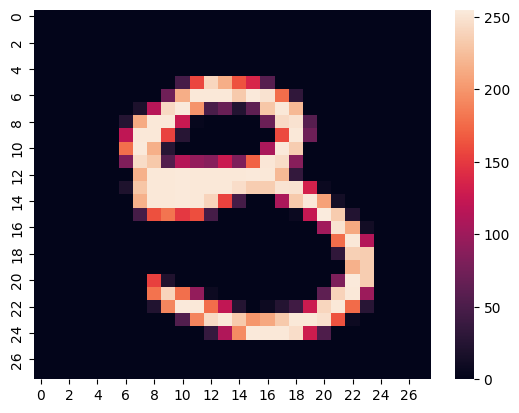

In [ ]:
sns.heatmap( train_X[0].reshape(28,28))

In [ ]:
train_y[0]

'3'

In [ ]:
# 실제:EDA를 타이틀하게 진행을 해야함
# 새로운 변수들도 만들어야 하고,불필요한 변수들은 제거도 해야 함
# 여기서는 skip을 하고 진행을 함
# **메인이기는 하다**

In [ ]:
#정답: 정답에 대한 분포
#--> pandas : value_counts()
#1) 정답에 대한 종류: 10개--> 다중 클래스 문제
#2) 각각 정답의 종류에 대한 비율: 10개가 대략 엇비슷한 비율-> 한 쪽으로 쏠린 경우: imbalance problem
#데이터 쪽 신경,평가지표
#--> 주어진 mnist의 데이터 분류에 대한 평가 기준: 일반적인 acuuracy 사용해도 괜찮다.

In [ ]:
np.unique(train_y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
np.unique(train_y,return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([5247, 5866, 5235, 5351, 5081, 4743, 5199, 5476, 5148, 5154]))

In [ ]:
#중요 정답에 대한 비율/ 분포 체크
#--> 모델링을 하기 전에 처리할 작업들을 고민 + 평가 지표들에 대해서도 고민

In [ ]:
#돌릴려는 모델을 세팅 F를 선택
#f-->knn 분류: 메뉴얼을 보고 선택(pycaret:지가 알아서 다 돌림!)
#1) 사용할 모델을 불러와야 함!
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
# 참고) n_jobs: 알고리즘 자체가 아니라 단순 연산 효율 병쳘처리 -1 최대성능
#               cpu 베이스이고,gpu 기반이 아님
#               --> 클라우드나 워크스테이션에서 cpu의 코어수가 많은 것이 기준!
# 참고) 구체적인 f에 대한 세팅을 하면서, 주어진 데이터에서 최적의 성능을 뽑기 위한 과정
#       HyperParameter Tunning **성능
#       - 직접 하나씩 탐색:gridsearch
#       - 랜덤 조합으로 탐색: randomgruidsearch
#       - ++베이지안 최적화:optuna,rayTune etc(200X초반)
#====>AutoML(상당히 괜찮음) 그러나 Feature에 대한 변환/처리/생성 +도메인 지식

In [ ]:
# 2) 학습을 수행: 주어진 데이터에 맞춰서 내가 세팅한 (디테일하게 세팅한 f)에 대한 파라미터를 최적화:Learning
#--> 시간이 오래걸리는 부분 + k-fold

#학습할 문제지와 정답지
knn.fit(train_X,train_y)

KNeighborsClassifier(n_jobs=-1)

In [ ]:
# 3) 2번에서 공부한 것을 바탕으로 실전 문제를 풀어!!
# ==> .predict
# 실제 수능시험의 OMR카드!!!
pred = knn.predict(test_X)
pred

array(['6', '6', '7', ..., '7', '8', '6'], dtype=object)

In [ ]:
#참고) 일반적인 알고리즘은 fit가 오래걸리고 predict는 적용만 하는 것이라 짧음.
#-knn의 종특에 의해서,,반대 상황

<Axes: >

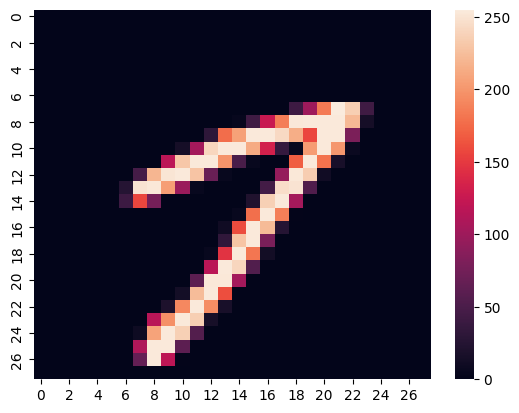

In [ ]:
sns.heatmap(test_X[2].reshape(28,28))

In [ ]:
# 4) 평가원처럼 채점 : 새로운 문제들에 대해서 OMR카드 채점
# ==> 기준 : accuracy
accuracy_score( test_y, pred)

0.9713714285714286

In [ ]:
# ==> 대충 knn이라는 모델을 바탕으로 내 데이터를 해보니 대충 성능이 0.97 acc
# BaseLine : 0.97
# ==> 나의 목적 : 0.97보다 더 높은 성능이 나오도록 knn의 디테일한 파라미터의 값을 변경하면서 이보다 더 좋은 성능을 찾아보자
#                 HPT( 대회 : 수단/방법 안 가림;) + 경우에 따라서는 한 번 학습은 운 : k-fold CV으로 사용을 하면서 평가!

In [ ]:
# k-fold CV
from sklearn.model_selection import cross_val_score

In [ ]:
#-->CV를 돌려가면서,knn에서 최적의 k의 값을 찾아보자
# hyperParameterTuning:HPT
#ex) 내가 f를 knn으로 선택했다고 하면-> 대충 acc 관점으로 성능을 체크:0.97
#    baseling:0.97acc
#--> KNeighborsClassifier(n_neighbors=1,2,3,4,5,6,6,67,7,77,8,8,8,8)체크
# m1) 직접 내가 하나씩 체크 : gridseracCV
# m2) 주어진 범위 내에서 샘플링 : randomgridesearchCV
# m3) 최근 베이지안 최적화

In [ ]:
# 직접 하나씩 해보자!!!!
# 1) 테스트할 파라미터들을 리스트업!!!
neighbors = [ i  for i in range(1,10) if i % 2 ==1]
# 1,3,5,7,9 : k
# 2) 1개 파리미터 값으로 했을 떄의 결과들을 모을 변수
cv_scores = []
# 3) 테스트할 값들을 돌리면 됨!!
for k in neighbors:
    # 3-1) 모델을 준비
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    # 3-2) k-fold를 train데이터를 k번 학습 & 평가!!!!
    # ==> 어떤 모델을 바탕으로, 문제, 정답, 몇 등분, 채점기준
    scores = cross_val_score(knn, train_X, train_y,
                             cv=10, scoring="accuracy")
    # scores에서는 k=1에 대해서 knn을 10번 적용한 acc 값들이
    cv_scores.append( scores.mean() )
    print(str(k)+"-k values Accuracy:", scores.mean())

1-k values Accuracy: 0.970057142857143
3-k values Accuracy: 0.9701142857142857
5-k values Accuracy: 0.9690666666666667
7-k values Accuracy: 0.9681333333333335
9-k values Accuracy: 0.9668571428571429


In [ ]:
#시도할 값들에 대해서 리스트업을 하고 그에 따른 반복문만 돌면 끝
#--> gridsearchCV,randomgridsearchCB 모듈화
# 가져다가 사용하면 됨

In [ ]:
# f를 다양하게 적용
# knn : 거의 사용 안 함
# svm : 요즘은 거의 사용안 함
# DT  : 잘 사용 안 함 *** 최근에 사용하는 모델의 근본
# ----------------------------------------

# 여러 모델을 활용한 모델 : 앙상블 모델
# --> Bagging : RandomForest  (체크 정도 )
# --> Boosting : xgboost, lightgbm, catboost (대세...)
# ====> 최근 알고리즘들은 거의 tree기반의 모형

# 최종 모델을 선택
# 1) 했던 여러개의 f들 중에서 best 1개 선택
# 2) 했던 여러 모델을 종합해서
#    - voting : hard / soft
#    - stacking : 대회에서 종종 사용하는 방법...현업..of/시간,,굳이..
# +++ Bagging 방식을 스케일업을 해서
#  etc //////

In [ ]:
# 전체적인 process가 데이터가 정해지면 정해진 루틴!
# ==> autoML

# + 최근에 사용하는 것 중심으로 진행..
# + 본인들 조별 프로젝트로 좀 넘기는 부분이 있음

In [ ]:
# ML 조별 프로젝트 발표 : 10/11 금요일 예정
# ==> 목적 : 주제를 잘 선택 + 데이터를 수집
# ==> 발표 핵심 : 수집한 데이터의 EDA를 통해서
#                 변수화 했을 때 모델의 성능이 어떻게 향상이 되는지
#                 + 모델을 어디에 사용할지
#                 ( 성능중심!!!,  설명 중심)
# 모델 : y = f(X)
#        입력X에 대해서 무엇으로 하고
#        어떤 y값을 예측하려고 하는지 고민

# 추천 : 추천 알고리즘!!!!!!!--> 룰베이스,,,deepFM etc 알고리즘상 내용
#         포폴로 보여주기에는 조금 애매한 구석...
#        ==> 새로운 추천 알고리즘을 만들거나 하는 각 잡고 해야하지 않을까
# ==> 예측값/ 예측 모델을 바탕으로 추천으로 우회